#**Heart Disease Prediction Binary Classification**

**what is heart disease?**

Heart disease refers to a range of conditions that affect the heart, its structure, or its function. It is often used interchangeably with cardiovascular disease, which includes conditions that involve narrowed or blocked blood vessels that can lead to heart attack, chest pain (angina), or stroke.

**why Heart Disease Prediction is Important?**

1. Early Detection: Enables early identification of individuals at risk.

2. Preventive Measures: Facilitates implementation of preventive interventions and lifestyle modifications.

3. Reduced Complications: Helps in preventing severe complications such as heart attacks and strokes.

4. Optimized Resource Allocation: Allows for efficient allocation of healthcare resources to high-risk populations.

5. Cost Savings: Reduces healthcare costs associated with treating heart disease and its complications.

6. Improved Quality of Life: Leads to better management of risk factors and enhanced overall well-being.

7. Public Health Initiatives: Supports population-level interventions for promoting heart health and reducing disease burden.

**About Dataset**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Dataset Link**: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

**Column Descriptions:**

1. id (Unique id for each patient)

2. age (Age of the patient in years)

3. origin (place of study)

4. sex (Male/Female)

5. cp chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic

6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7. chol (serum cholesterol in mg/dl)

8. fbs (if fasting blood sugar > 120 mg/dl)

9. restecg (resting electrocardiographic results):
 <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy

10. thalach: maximum heart rate achieved

11. exang: exercise-induced angina (True/ False)

12. oldpeak: ST depression induced by exercise relative to rest

13. slope: the slope of the peak exercise ST segment
<br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping

14. ca: number of major vessels (0-3) colored by fluoroscopy

15. thal: Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described

16.  Heart disease status (0 = no disease, 1 = presence of disease)

**Importing necessay libraries**

In [88]:
#to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#**Data PreProcessing**

**Load the datset**

In [89]:
df = pd.read_csv("/content/heart_disease_uci.csv")

In [90]:
# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Accessing Data**

In [91]:
#shape of dataset
df.shape

(920, 16)

In [92]:
#columns of dataset
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [93]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [94]:
#description of a dataset
df.describe(percentiles=[0.25,0.75]).T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [95]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [96]:
#checking the missing values
df.isnull().mean().sort_values(ascending=False)*100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

we will first explore the distribution of the dataset then fix the missing values

In [97]:
#checking duplicate values
df.duplicated().sum()

0

#**Exploratory Data Analysis**

**univariate Analysis**

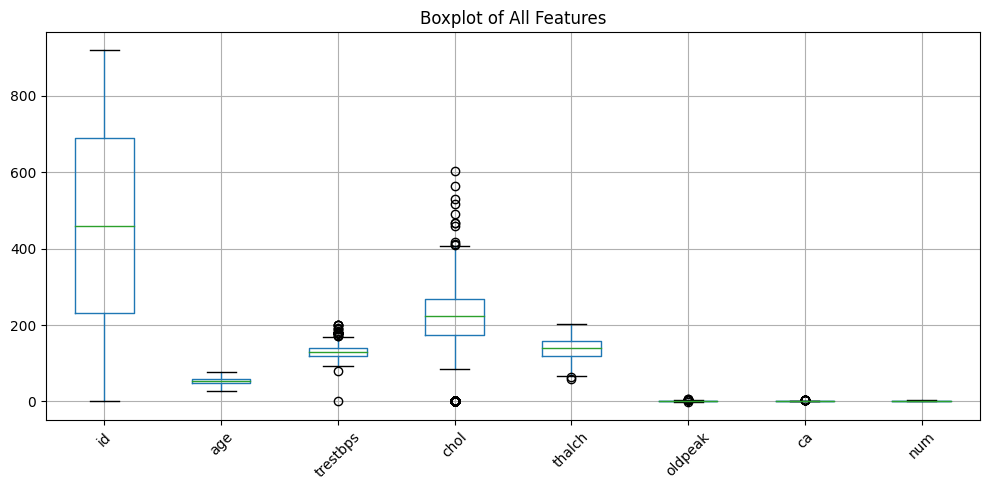

In [98]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.title('Boxplot of All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**we can see that chol has a outliers**

**distribution of numerical columns**

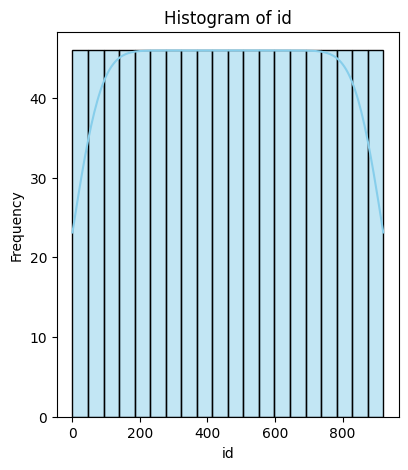

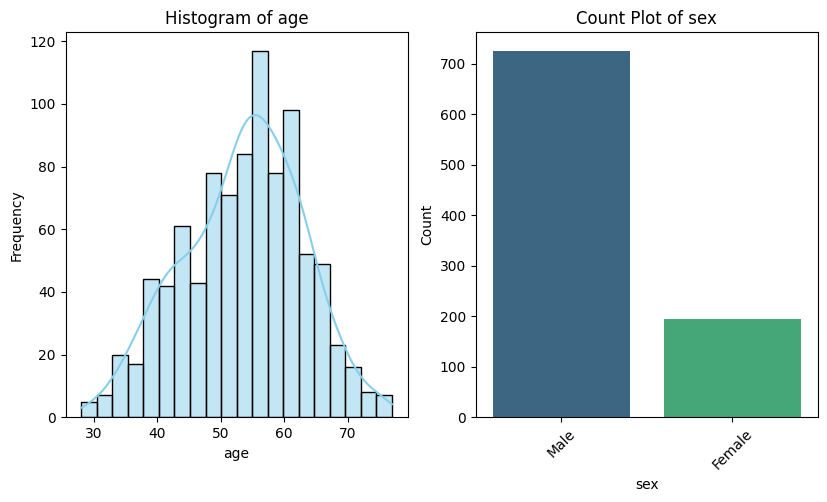

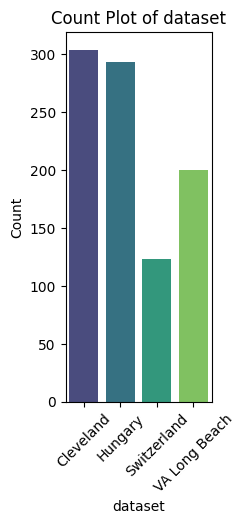

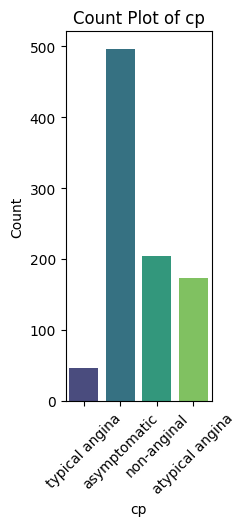

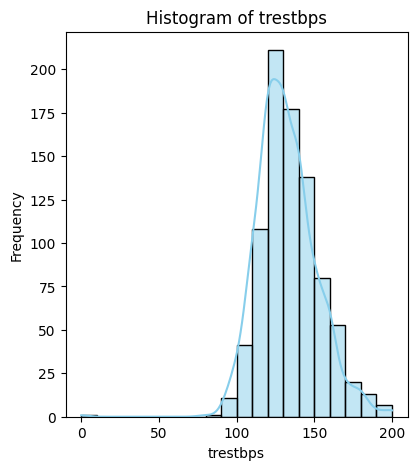

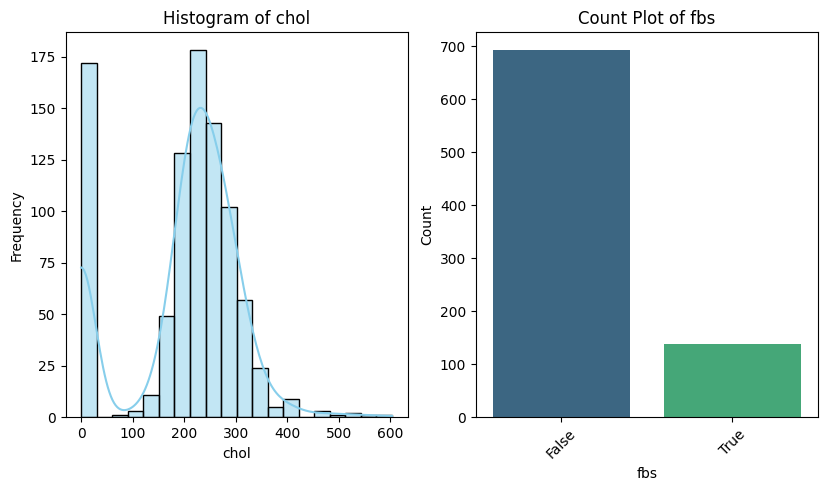

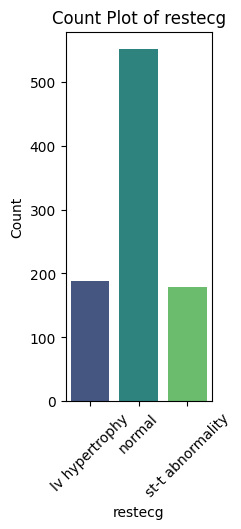

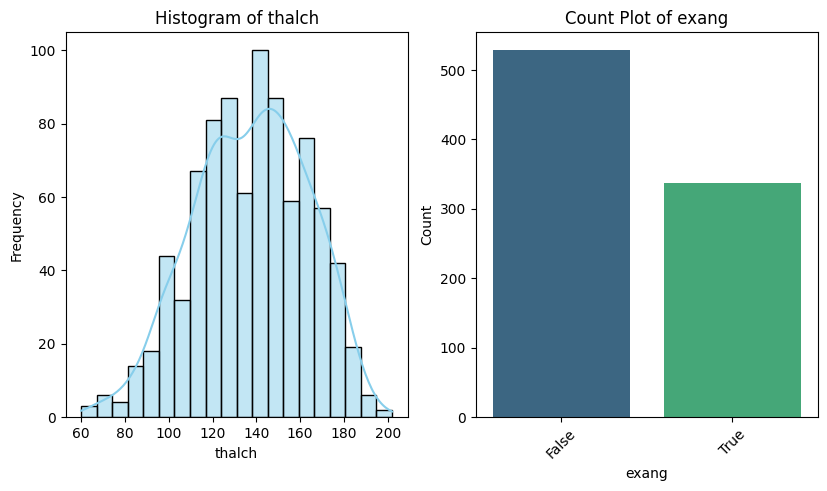

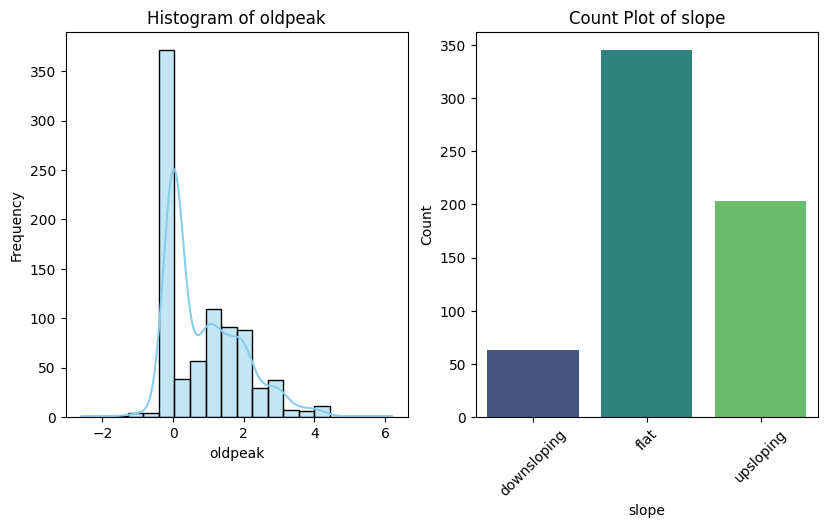

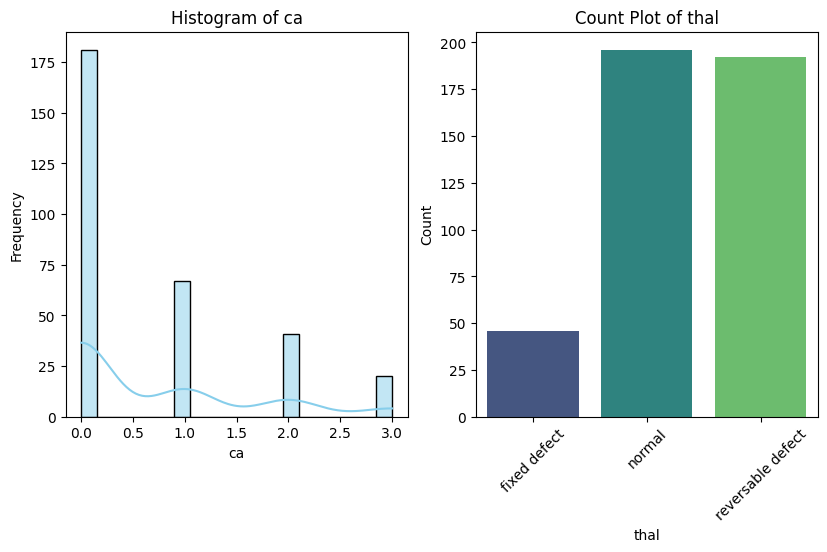

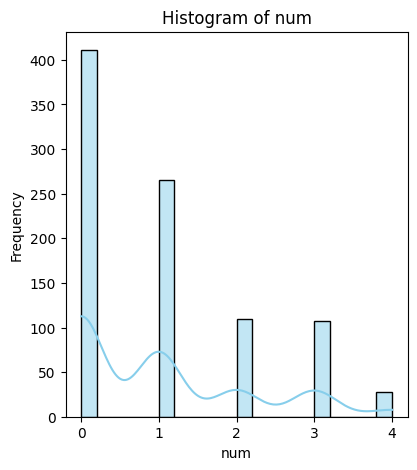

In [99]:
for col in df.columns:
  if df[col].dtype in ['int64','float64']:
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Check if the column is categorical
  elif df[col].dtype == 'object':
        # Plot count plot using seaborn
        plt.subplot(132)
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [100]:
# find the values of sex column
sex_counts=df['sex'].value_counts()

In [101]:
# calculate the percentages of male and female value counts in the data
df["sex"].value_counts()/len(df)*100

Male      78.913043
Female    21.086957
Name: sex, dtype: float64

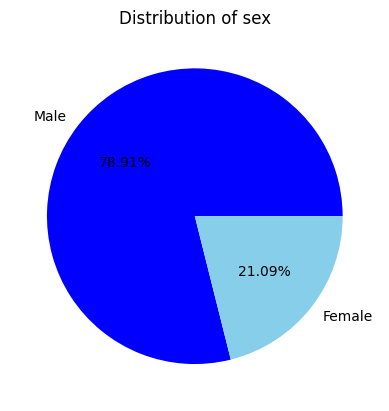

In [102]:
plt.pie(sex_counts,labels=sex_counts.index,autopct="%1.2f%%",colors=["blue","skyblue"])
plt.title("Distribution of sex")
plt.show()

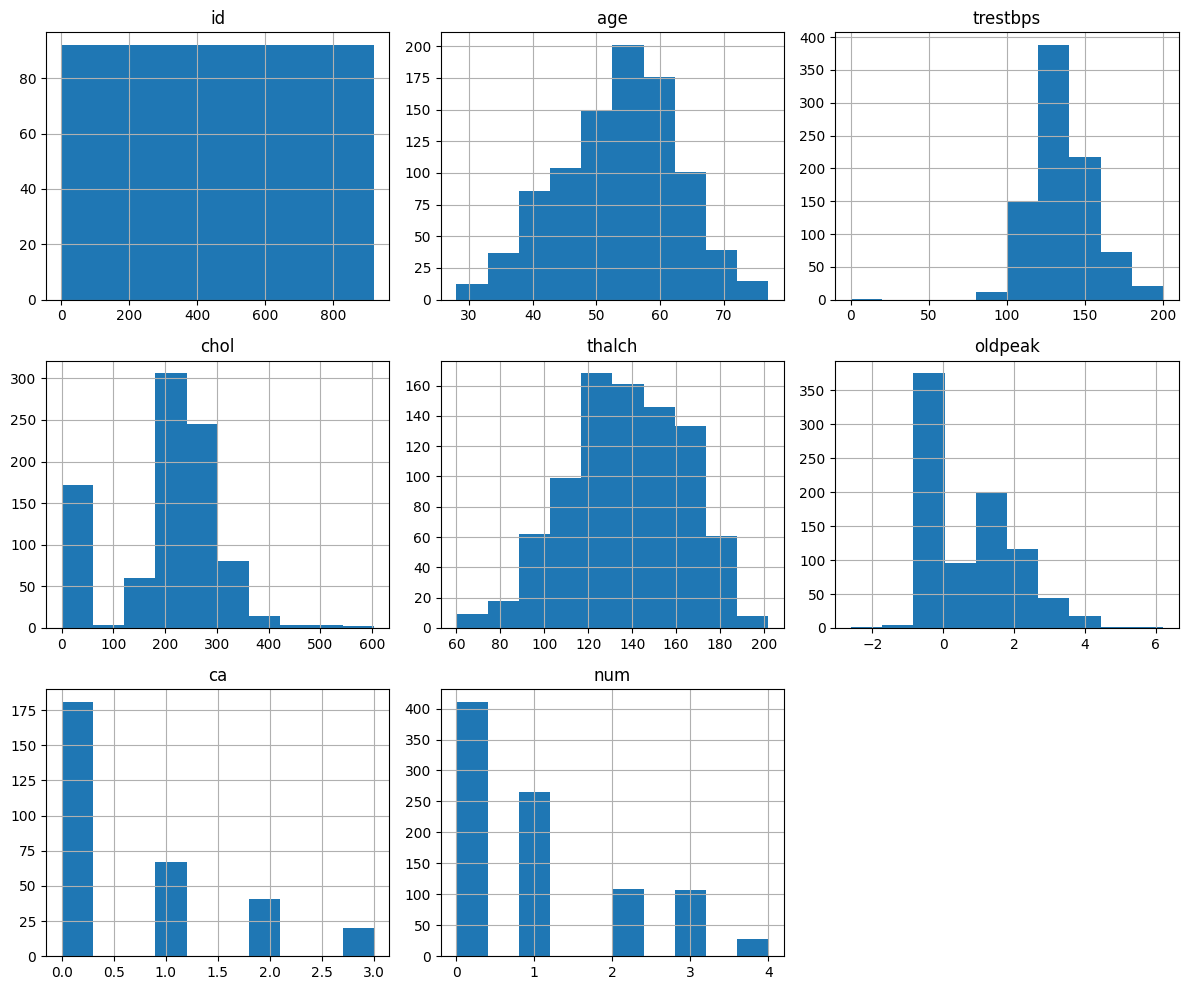

In [103]:
#histogram of numerical dataset
df.hist(figsize=(12, 10))  # Adjust figsize as needed
plt.tight_layout()  # Adjust layout
plt.show()

**Bivariate analysis**

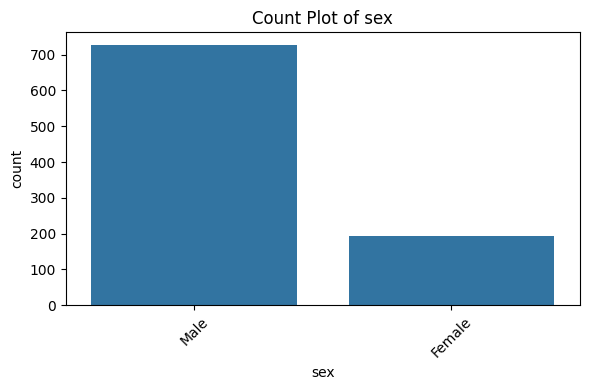

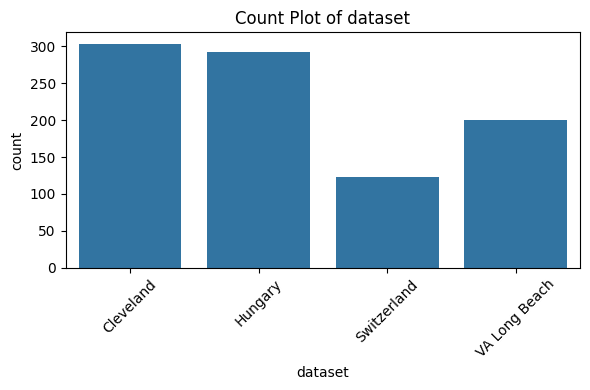

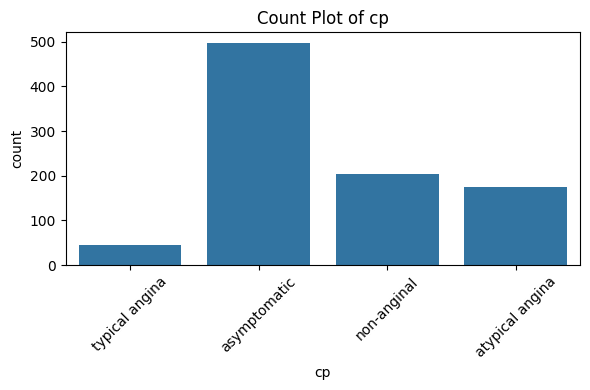

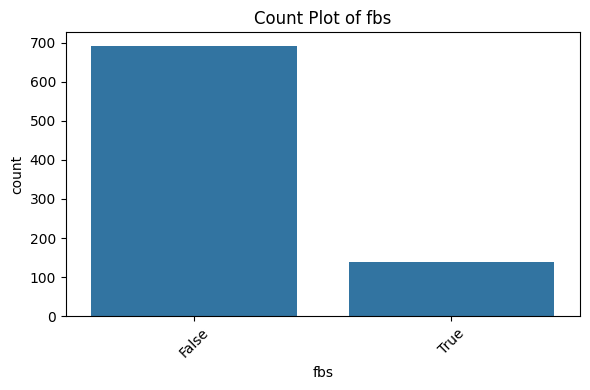

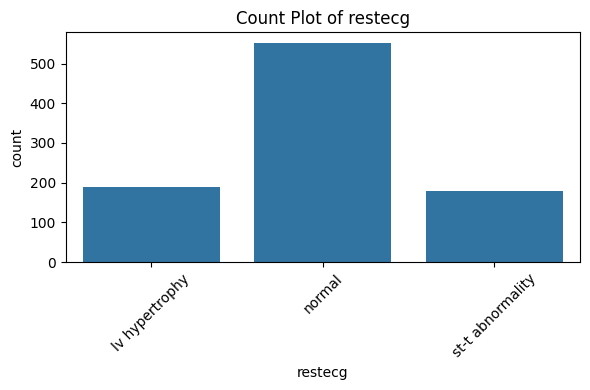

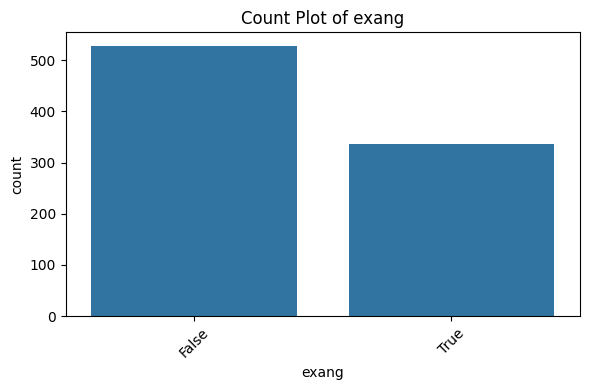

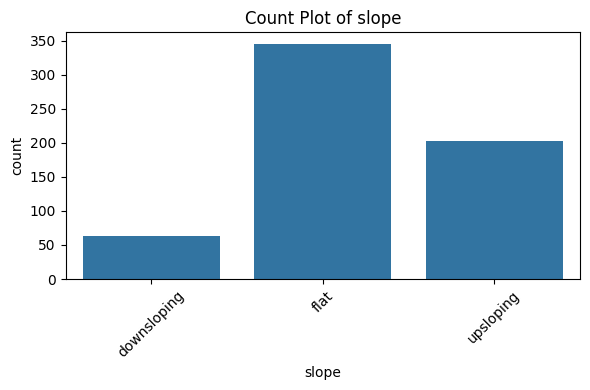

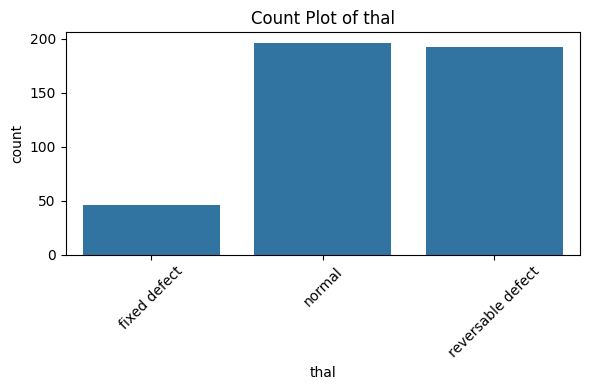

In [104]:
#numerical columns
for column in df.select_dtypes(include='object'):  # Select categorical columns
    plt.figure(figsize=(6, 4))  # Adjust figsize as needed
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout
    plt.show()

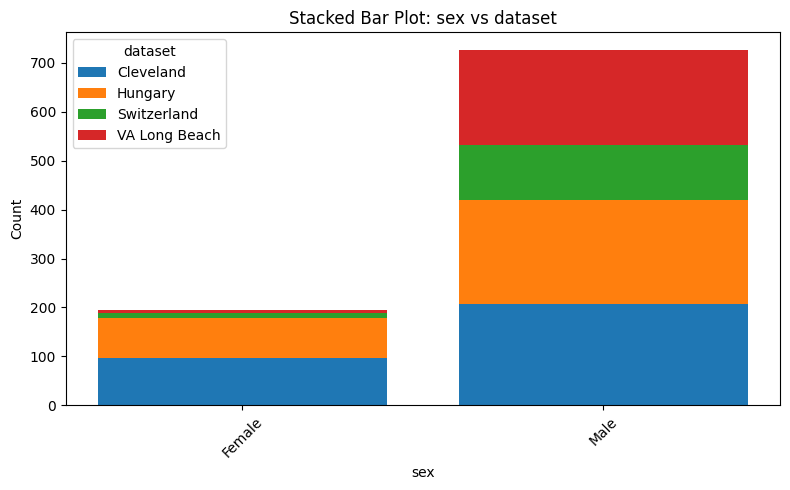

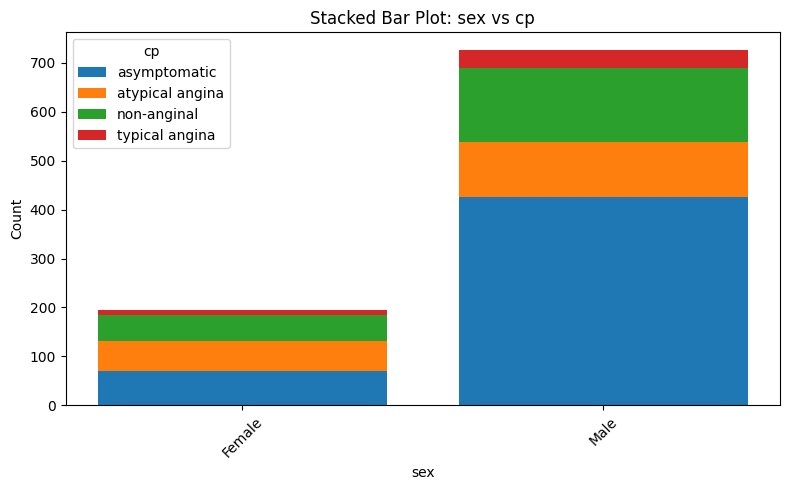

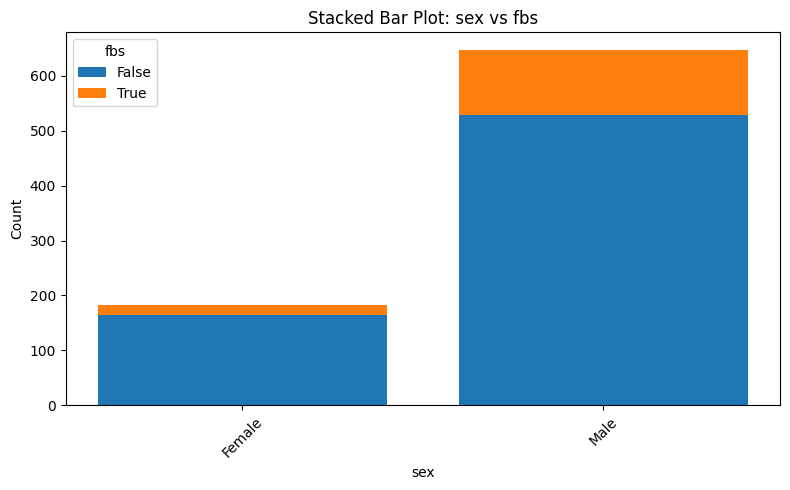

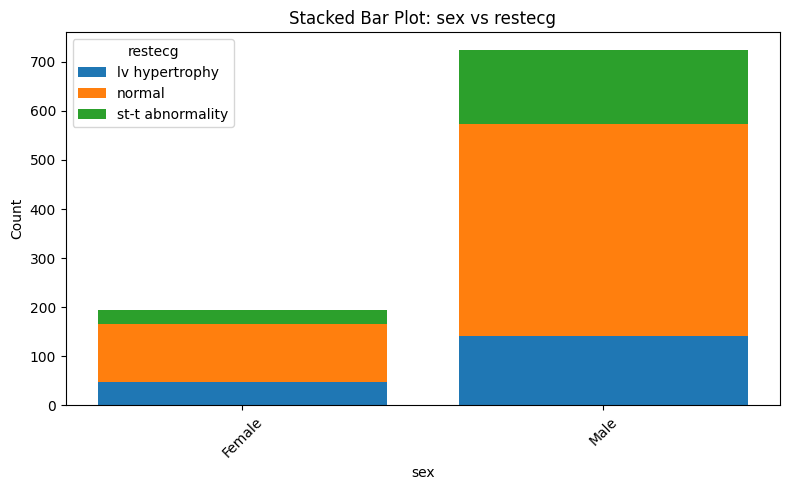

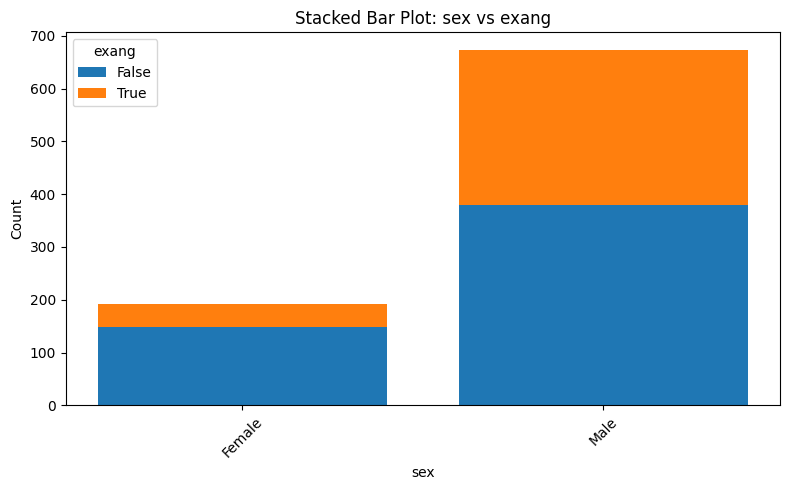

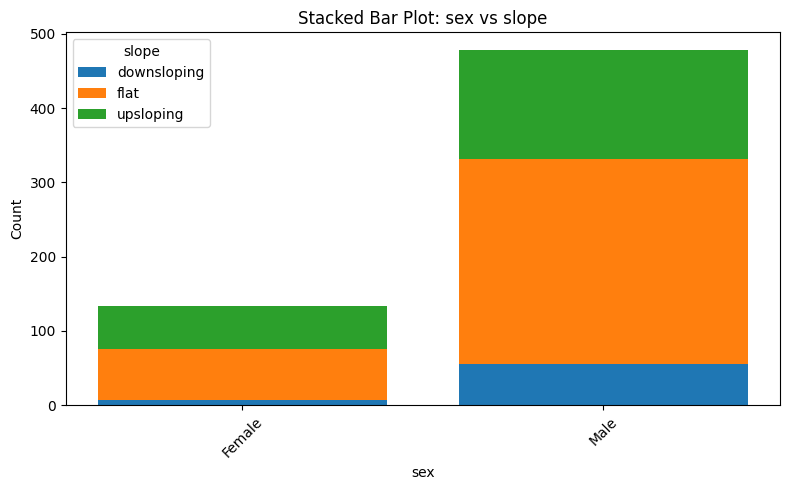

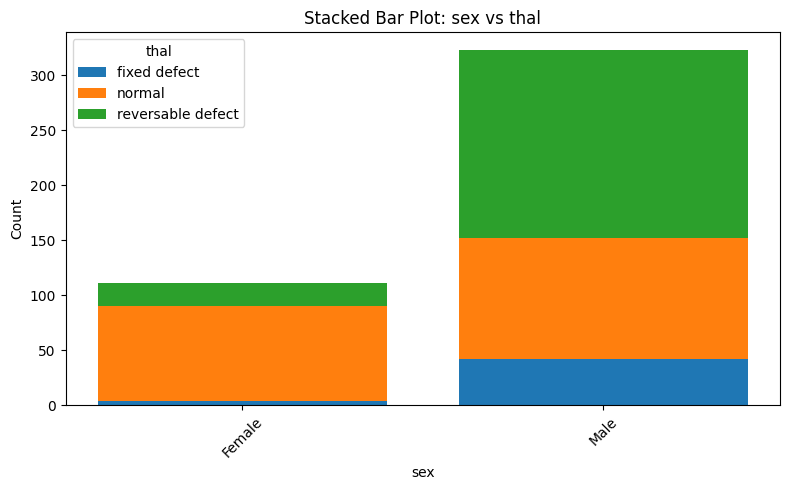

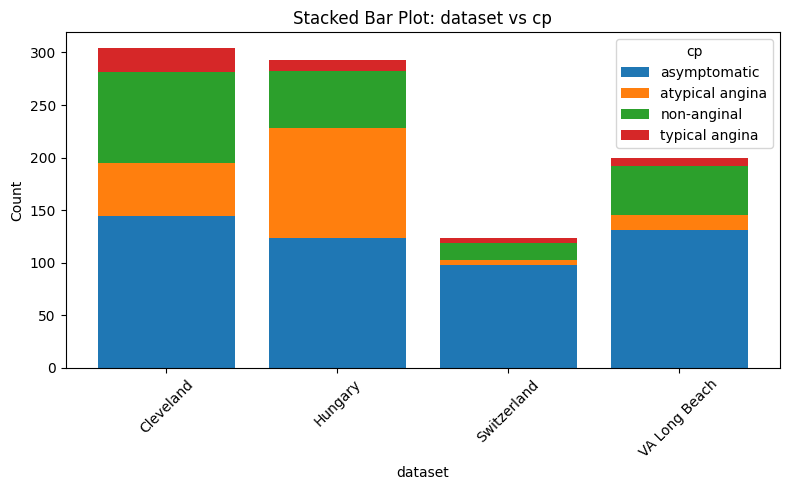

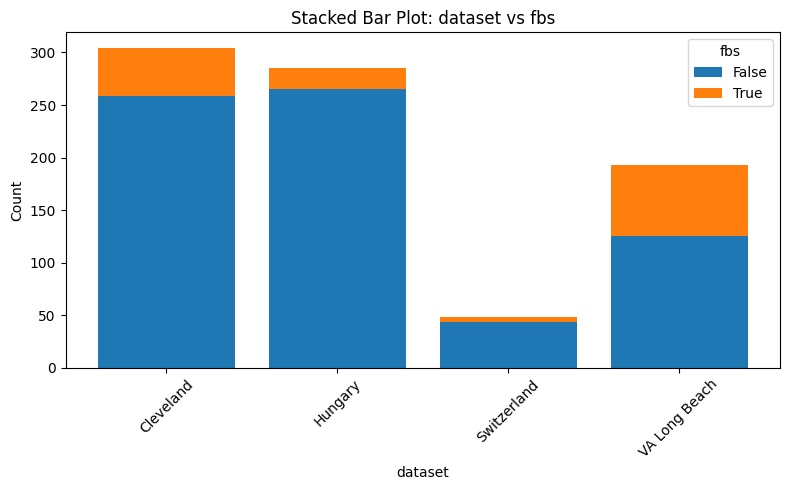

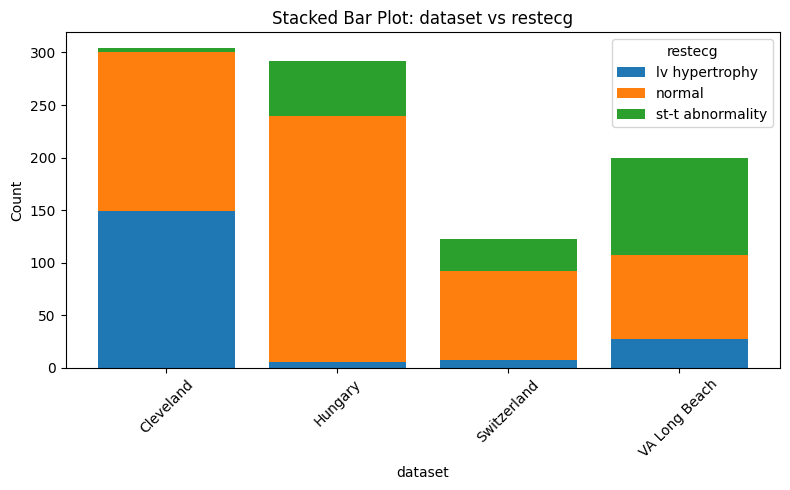

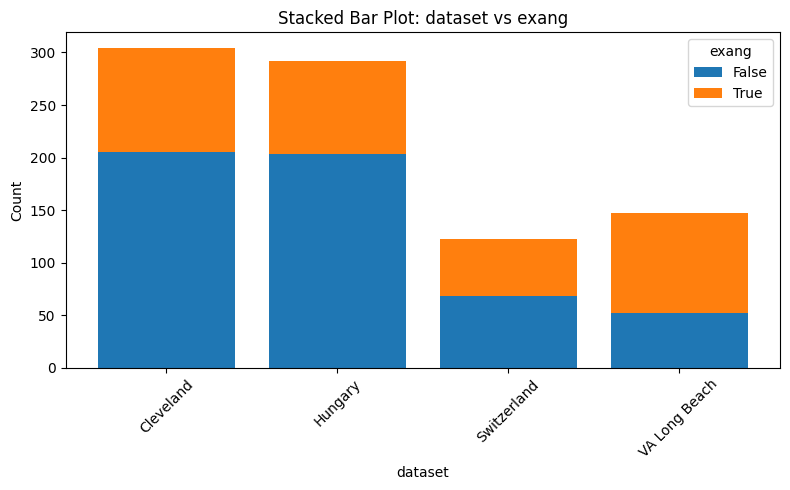

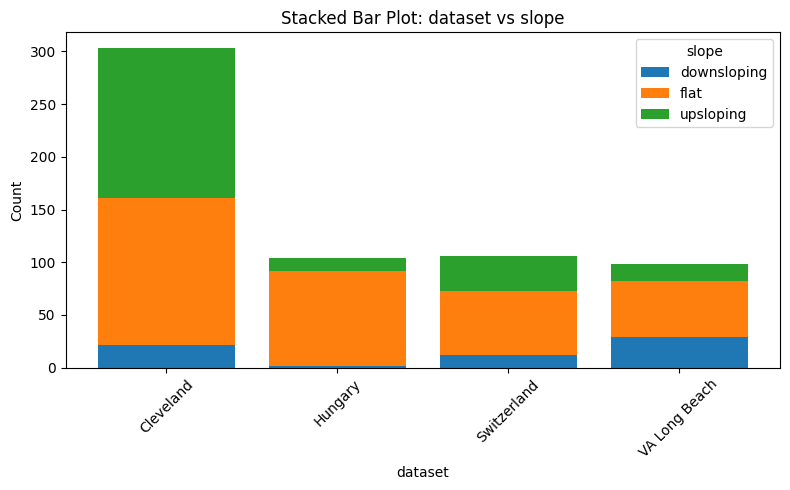

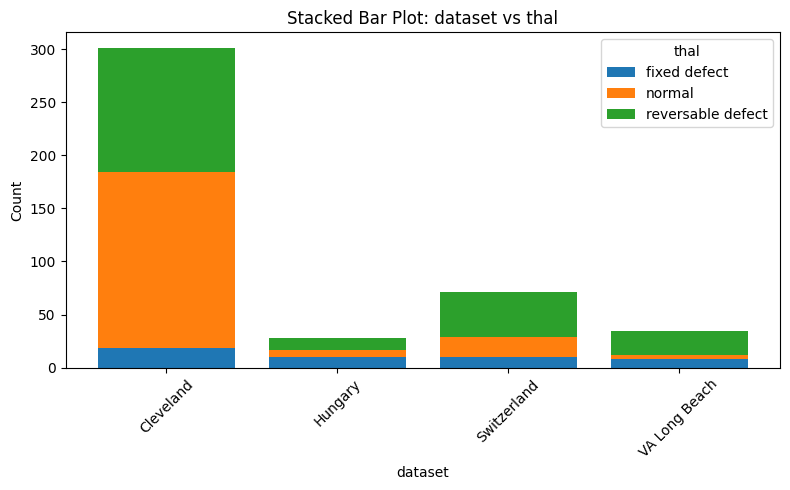

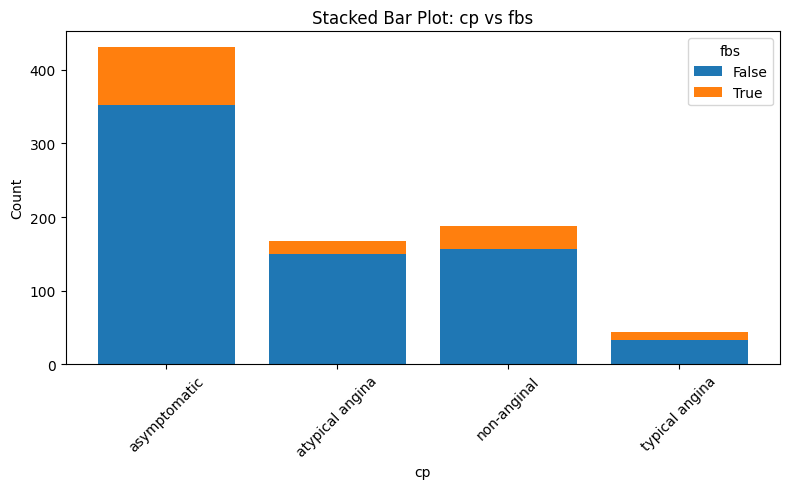

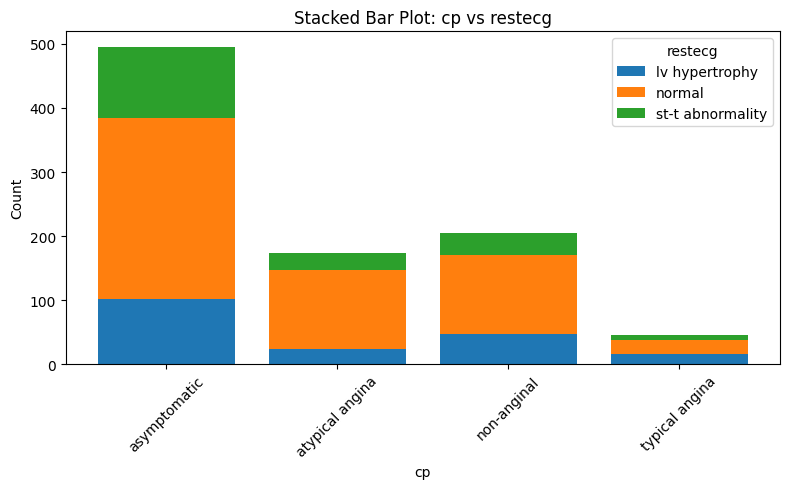

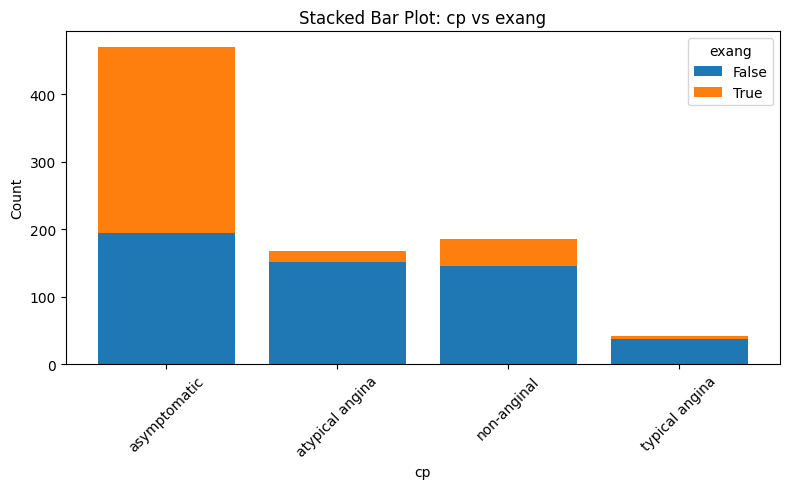

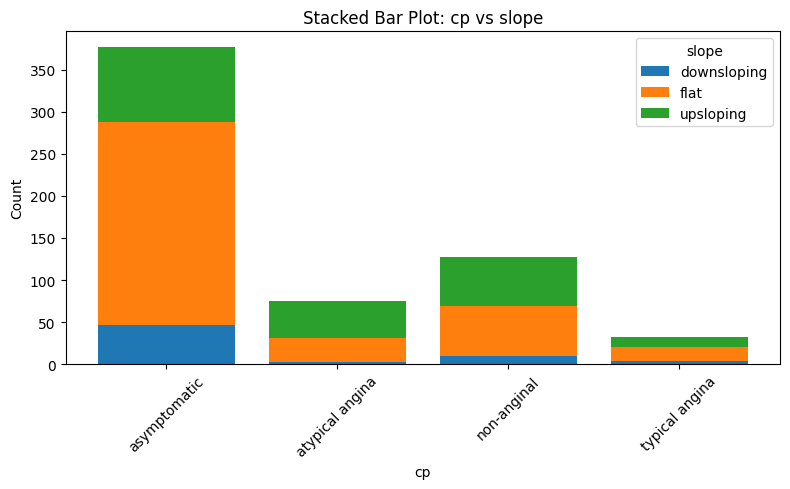

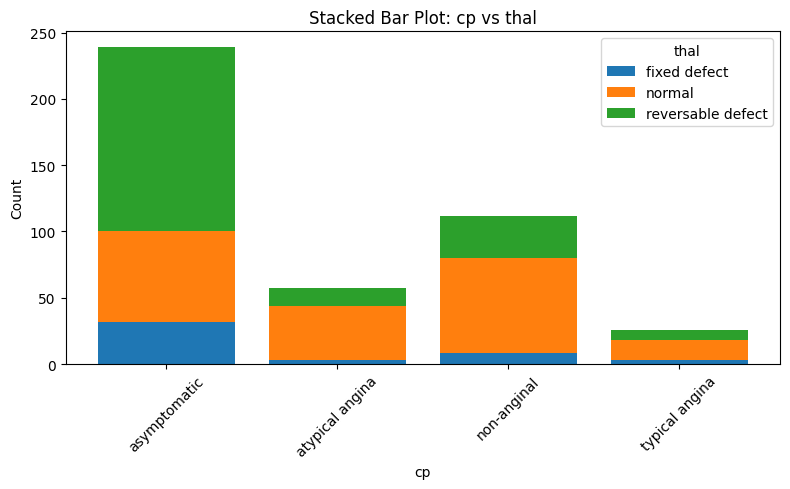

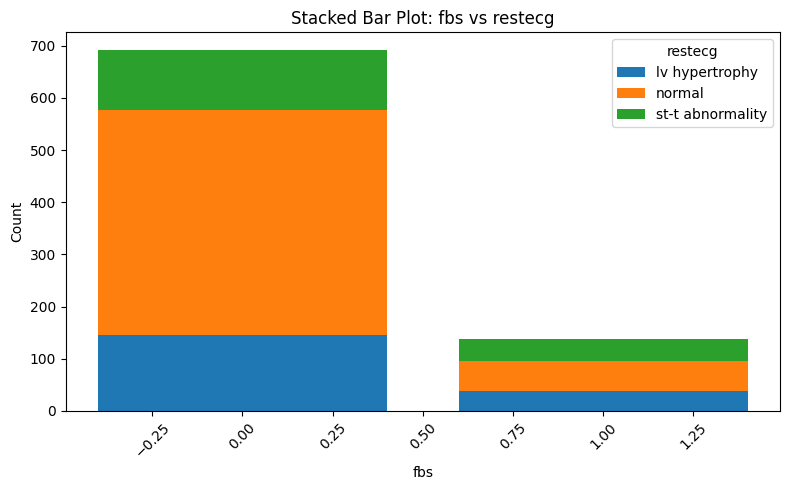

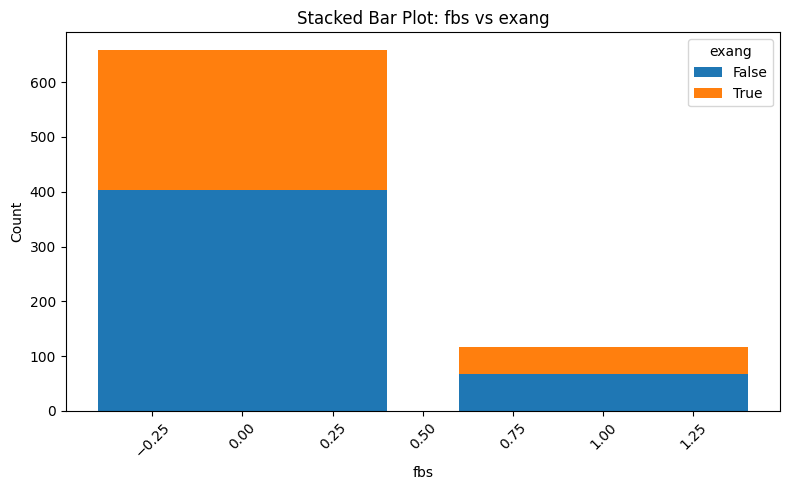

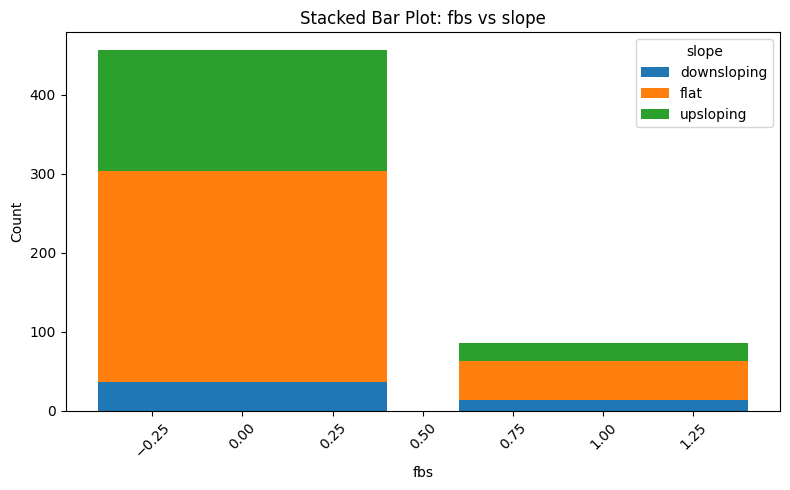

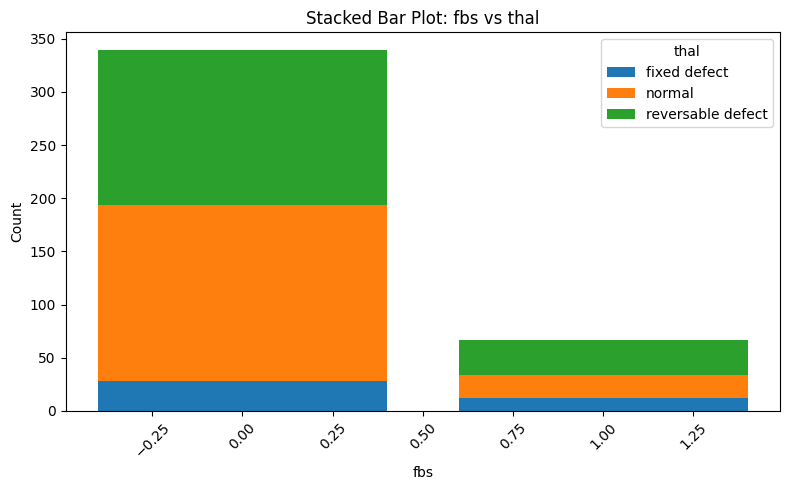

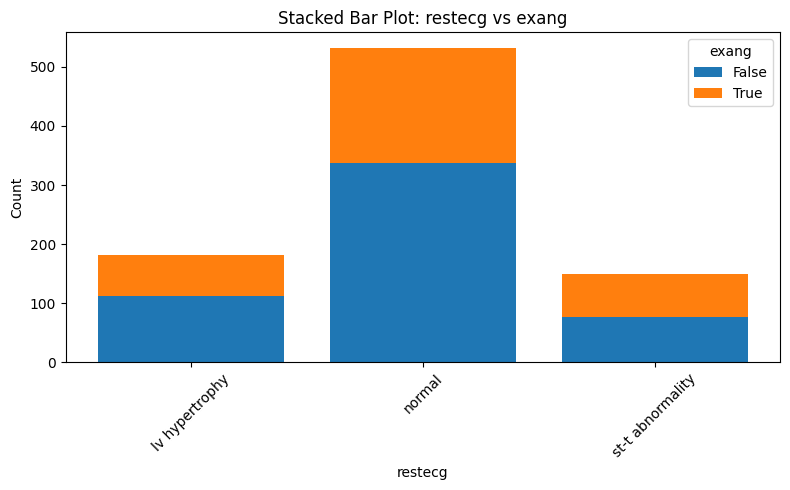

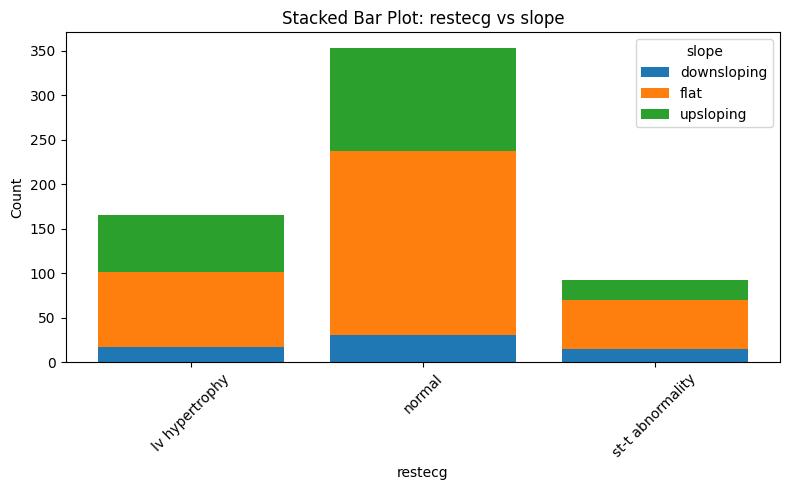

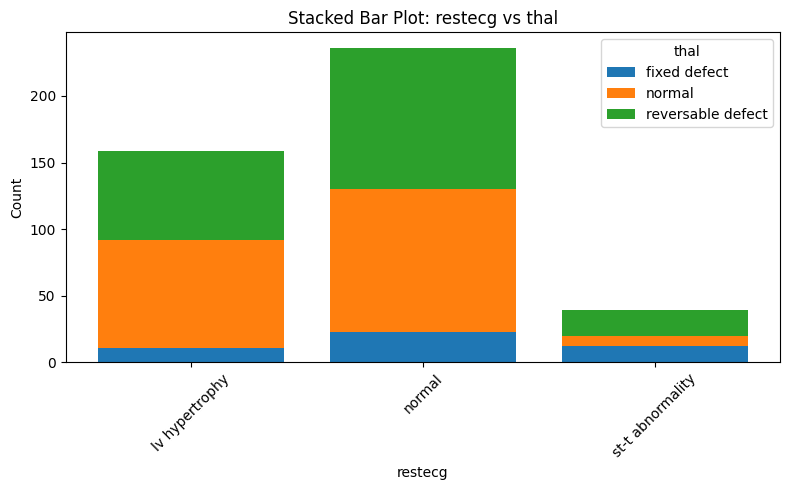

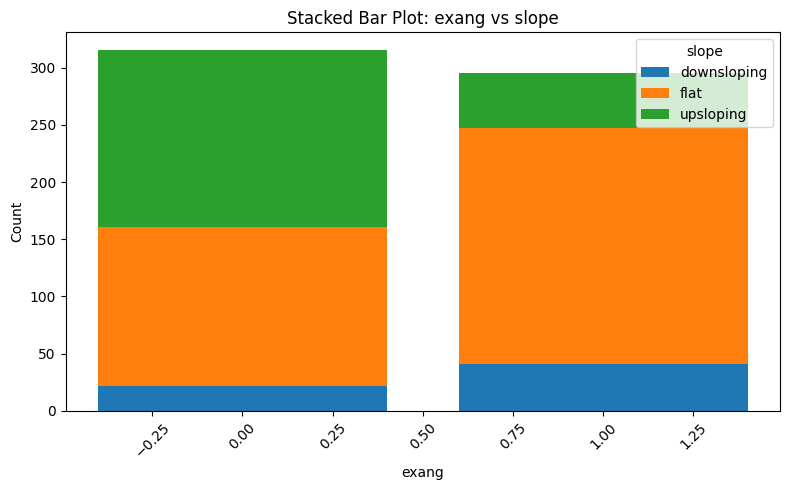

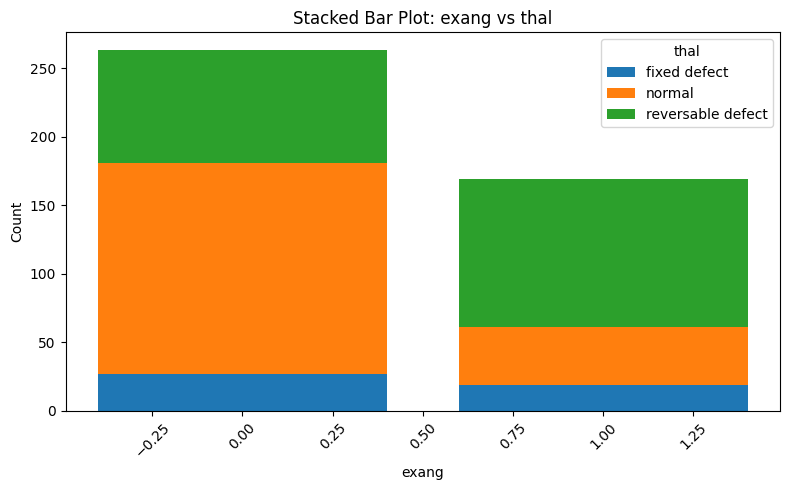

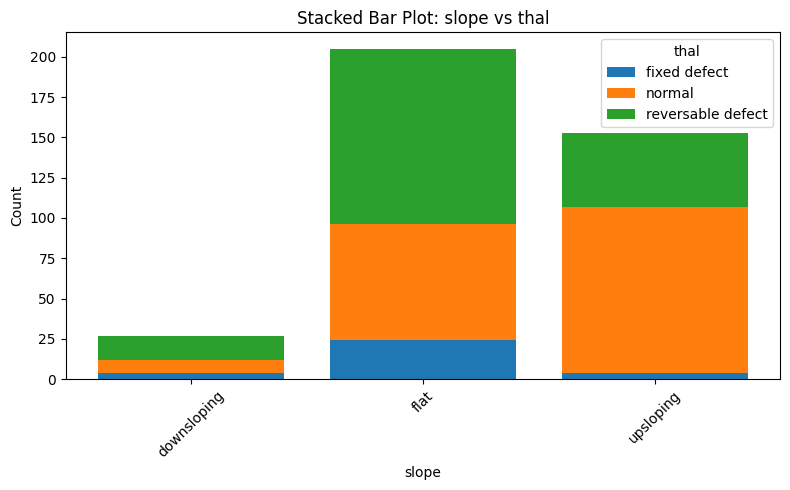

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the names of categorical variables from df.columns
categorical_variables = df.select_dtypes(include='object').columns.tolist()

for i in range(len(categorical_variables)):
    for j in range(i+1, len(categorical_variables)):
        plt.figure(figsize=(8,5))

        # Crosstabulation for count
        cross_tab = pd.crosstab(df[categorical_variables[i]], df[categorical_variables[j]])

        # Stacked Bar Plot
        plt.bar(cross_tab.index, cross_tab.iloc[:, 0], label=cross_tab.columns[0])
        bottom = cross_tab.iloc[:, 0]
        for col in cross_tab.columns[1:]:
            plt.bar(cross_tab.index, cross_tab[col], bottom=bottom, label=col)
            bottom += cross_tab[col]

        plt.title(f'Stacked Bar Plot: {categorical_variables[i]} vs {categorical_variables[j]}')
        plt.xlabel(categorical_variables[i])
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title=categorical_variables[j])

        plt.tight_layout()
        plt.show()


<Axes: xlabel='thal', ylabel='count'>

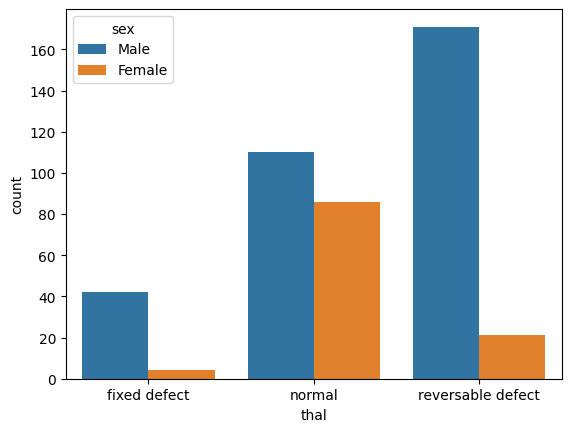

In [106]:
# count plot of thal column by sex column
sns.countplot(df, x='thal', hue='sex')

<Axes: xlabel='sex', ylabel='count'>

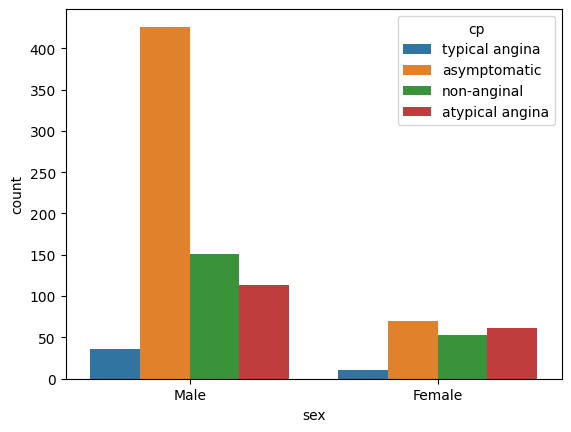

In [107]:
#sex with cp
sns.countplot(df, x='sex', hue='cp')

<Axes: xlabel='thal', ylabel='count'>

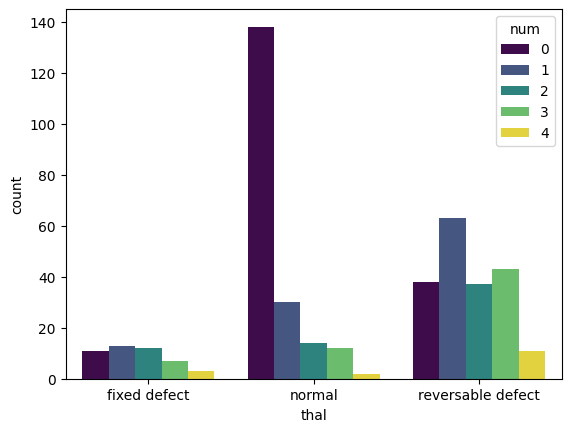

In [108]:
#num with thal
sns.countplot(df, x='thal', hue='num' , palette='viridis')

<Axes: xlabel='num', ylabel='count'>

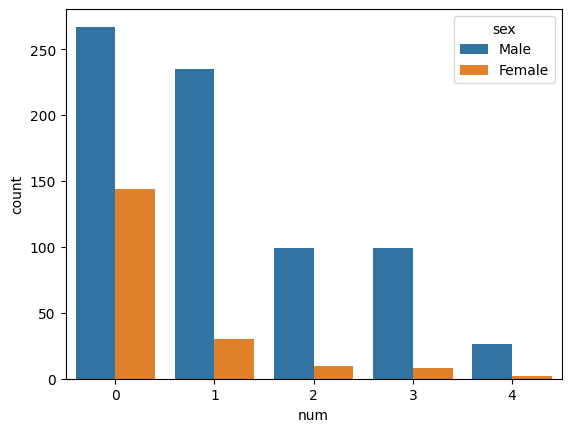

In [109]:
sns.countplot(df, x='num', hue='sex')

<Axes: xlabel='age', ylabel='Count'>

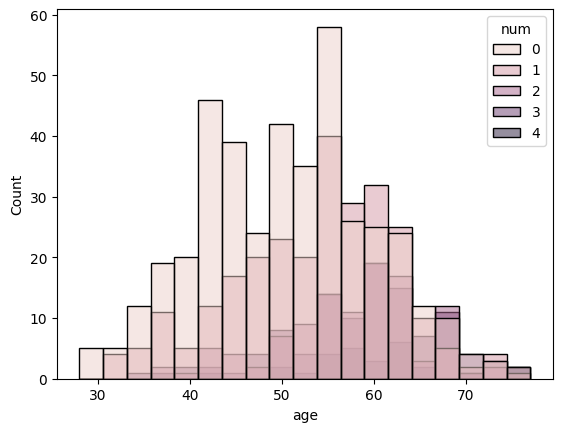

In [110]:
sns.histplot(data=df,x="age",hue="num")

**Dealing with missing values**

In [111]:
#check null values
df.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [112]:
#choosing the necessary columns
new_df=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]

In [113]:
new_df.isnull().mean()*100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [114]:
new_df["thal"].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

**filling the missing values with random sample imputer**

In [115]:
new_df['thal'].fillna(pd.Series(np.random.choice(new_df['thal'].dropna(), size=len(new_df['thal']))), inplace=True)

In [116]:
new_df["thal"].value_counts()

reversable defect    418
normal               405
fixed defect          97
Name: thal, dtype: int64

In [117]:
new_df["ca"].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [118]:
new_df['ca'].fillna(pd.Series(np.random.choice(new_df['ca'].dropna(), size=len(new_df['ca']))), inplace=True)

In [119]:
new_df["ca"].value_counts()

0.0    557
1.0    185
2.0    114
3.0     64
Name: ca, dtype: int64

In [120]:
new_df["slope"].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [121]:
new_df['slope'].fillna(pd.Series(np.random.choice(new_df['slope'].dropna(), size=len(new_df['slope']))), inplace=True)

In [122]:
new_df['slope'].value_counts()

flat           522
upsloping      303
downsloping     95
Name: slope, dtype: int64

In [123]:
new_df1 = new_df.dropna()

In [124]:
new_df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [125]:
new_df1.nunique()

age          50
sex           2
cp            4
trestbps     58
chol        208
fbs           2
restecg       3
thalch      115
exang         2
oldpeak      44
slope         3
ca            4
thal          3
num           5
dtype: int64

**Converting Categorical Values to Numerical Values**

In [126]:
new_df1.replace({"Male":1,"Female":0},inplace=True)

In [127]:
new_df1.replace({'asymptomatic':3,'non-anginal':2,'atypical angina':1,'typical angina':0},inplace=True)

In [128]:
new_df1["cp"].value_counts()

3    392
2    161
1    150
0     37
Name: cp, dtype: int64

In [129]:
new_df1.nunique()

age          50
sex           2
cp            4
trestbps     58
chol        208
fbs           2
restecg       3
thalch      115
exang         2
oldpeak      44
slope         3
ca            4
thal          3
num           5
dtype: int64

In [130]:
new_df1.replace({"True":1,"False":0},inplace=True)

In [131]:
new_df1["exang"].replace({"True":1,"False":0},inplace=True)

In [132]:
new_df1["restecg"].value_counts()

normal              445
lv hypertrophy      175
st-t abnormality    120
Name: restecg, dtype: int64

In [133]:
new_df1["restecg"].replace({"normal":2,"lv hypertrophy":1,"st-t abnormality":0},inplace=True)

In [134]:
new_df1["slope"].replace({"flat":2,"upsloping":1,"downsloping":0},inplace=True)

In [135]:
new_df1["thal"].value_counts()

normal               333
reversable defect    330
fixed defect          77
Name: thal, dtype: int64

In [136]:
new_df1["thal"].replace({"normal":2,"reversable defect":1,"fixed defect":0},inplace=True)

In [137]:
new_df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,145.0,233.0,True,1,150.0,False,2.3,0,0.0,0,0
1,67,1,3,160.0,286.0,False,1,108.0,True,1.5,2,3.0,2,2
2,67,1,3,120.0,229.0,False,1,129.0,True,2.6,2,2.0,1,1
3,37,1,2,130.0,250.0,False,2,187.0,False,3.5,0,0.0,2,0
4,41,0,1,130.0,204.0,False,1,172.0,False,1.4,1,0.0,2,0


In [138]:
new_df1["exang"].value_counts()

False    444
True     296
Name: exang, dtype: int64

In [139]:
new_df1["fbs"]=new_df1["fbs"].astype("int")

In [140]:
new_df1["exang"]=new_df1["exang"].astype("int")

In [141]:
new_df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,145.0,233.0,1,1,150.0,0,2.3,0,0.0,0,0
1,67,1,3,160.0,286.0,0,1,108.0,1,1.5,2,3.0,2,2
2,67,1,3,120.0,229.0,0,1,129.0,1,2.6,2,2.0,1,1
3,37,1,2,130.0,250.0,0,2,187.0,0,3.5,0,0.0,2,0
4,41,0,1,130.0,204.0,0,1,172.0,0,1.4,1,0.0,2,0


In [142]:
new_df1["num"].value_counts()

0    357
1    204
2     79
3     78
4     22
Name: num, dtype: int64

In [143]:
new_df1["num"].replace({1:1,2:1,3:1,4:1},inplace=True)

In [144]:
new_df1["num"].value_counts()

1    383
0    357
Name: num, dtype: int64

In [145]:
new_df1.rename(columns={"num":"target"},inplace=True)

In [146]:
new_df1["target"].describe().T

count    740.000000
mean       0.517568
std        0.500029
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

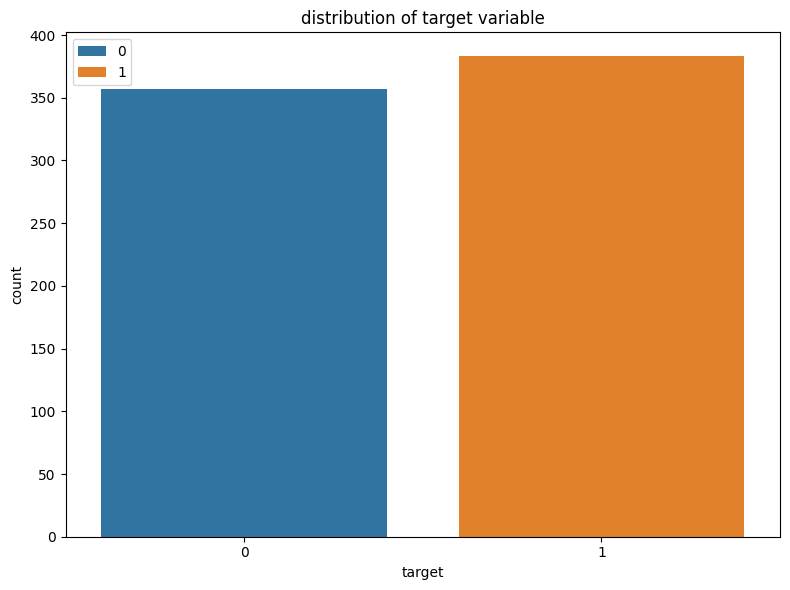

In [147]:
plt.figure(figsize=(8,6))
sns.countplot(data=new_df1,x="target",hue="target")
plt.title("distribution of target variable")
plt.tight_layout()
plt.legend()
plt.show()

#**Feature Engineering**

In [148]:
corr_matrix = new_df1.corr()
top_corr_features = corr_matrix.index

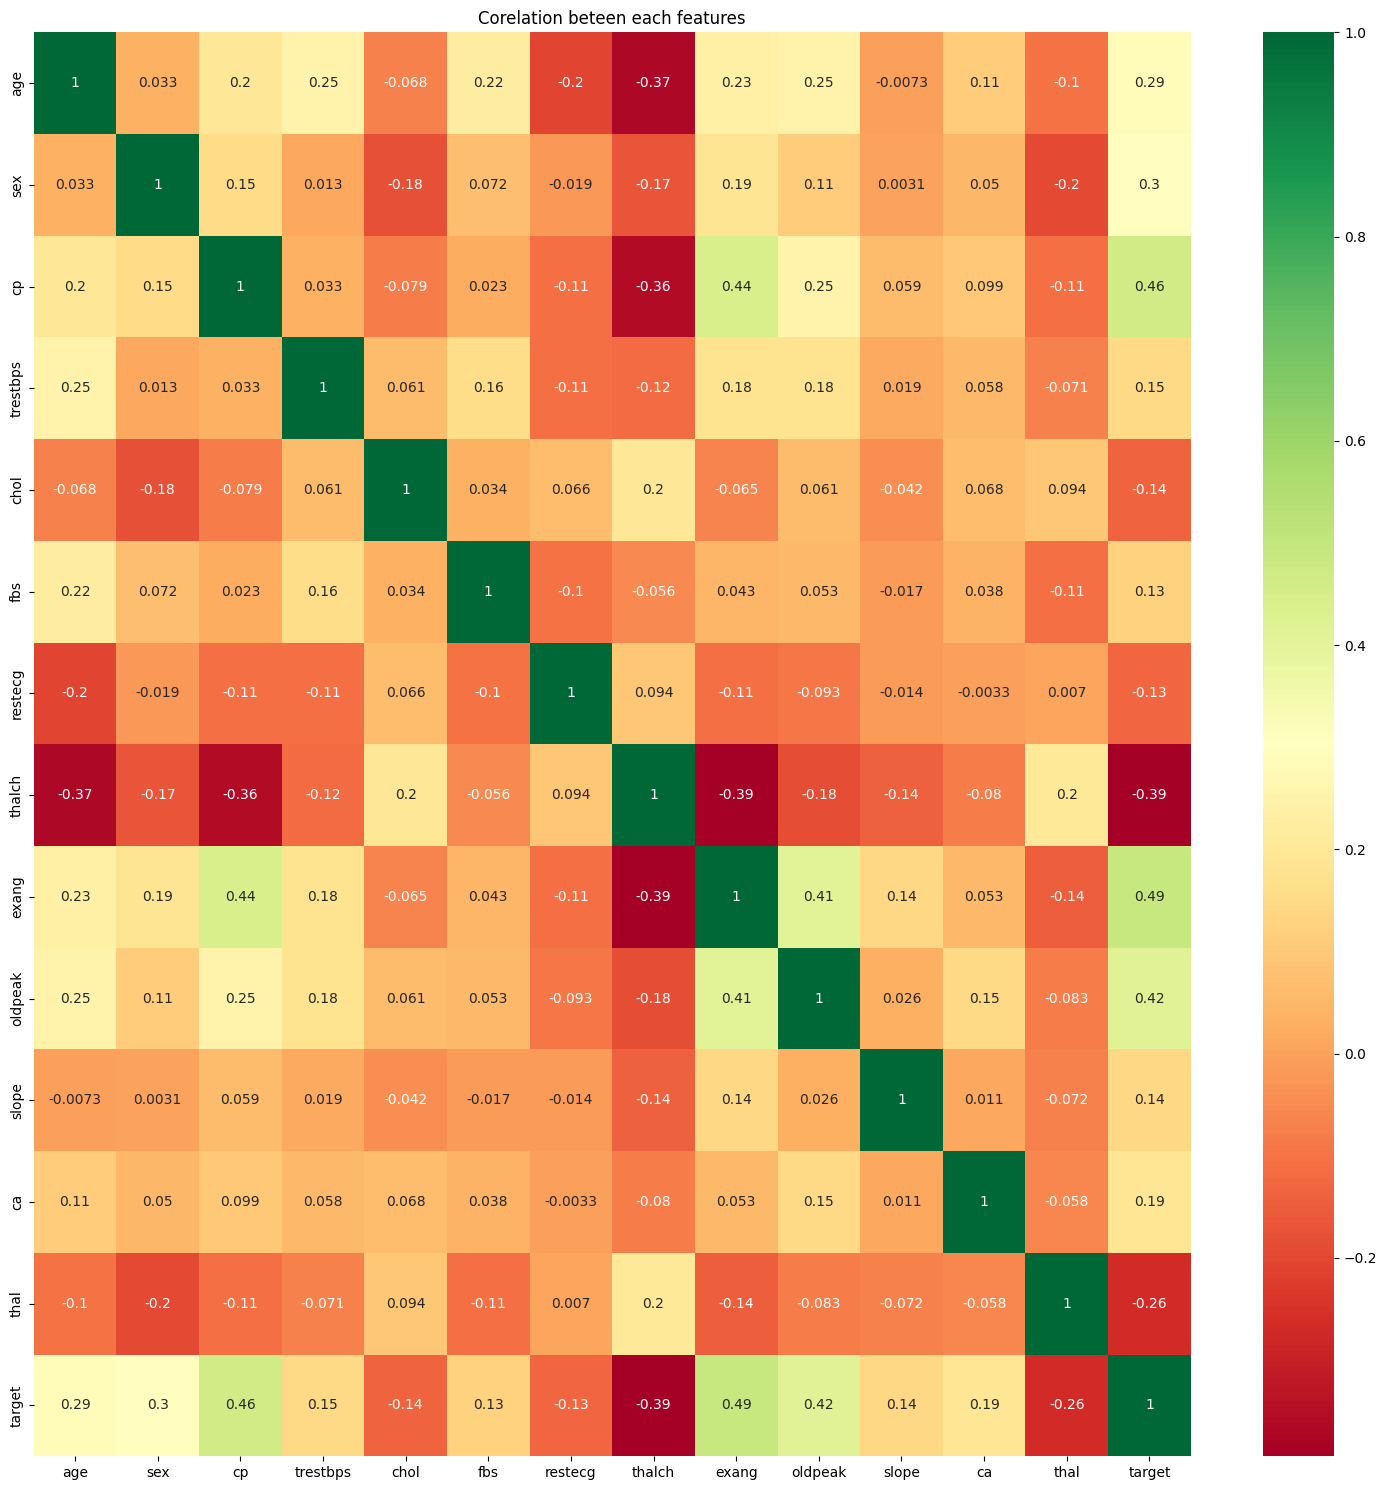

In [149]:
# Plotting the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title("Corelation beteen each features")
plt.tight_layout()
plt.show()

In [150]:
 df1=pd.get_dummies(new_df1, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)

**Feature Scaling**

In [151]:
df1.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_1', 'thal_2'],
      dtype='object')

In [152]:
df1.head()

,age,trestbps,chol,thalch,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1.0,ca_2.0,ca_3.0,thal_1,thal_2
0,63,145.0,233.0,150.0,2.3,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,67,160.0,286.0,108.0,1.5,1,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
2,67,120.0,229.0,129.0,2.6,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,37,130.0,250.0,187.0,3.5,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.

In [153]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

columns_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

df1[columns_to_scale] = Scaler.fit_transform(df1[columns_to_scale])

In [154]:
df1.head()

,age,trestbps,chol,thalch,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1.0,ca_2.0,ca_3.0,thal_1,thal_2
0,1.053281,0.659494,0.137502,0.435773,1.293854,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.478733,1.467306,0.704036,-1.190331,0.557494,1,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
2,1.478733,-0.686858,0.094745,-0.377279,1.569989,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,-1.712156,-0.148317,0.319221,1.868293,2.398395,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,-1.286705,-0.148317,-0.172488,1.287541,0.465449,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [155]:
# Splitting the dataset into dependent and independent features
X = df1.drop('target', axis=1)
y = df1['target']

#**Model Building**

1. KNeighbors Classifier

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [159]:
# Finding the best accuracy for knn algorithm using cross_val_score

knn_scores = []
for i  in range(10,35):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier,X,y,cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

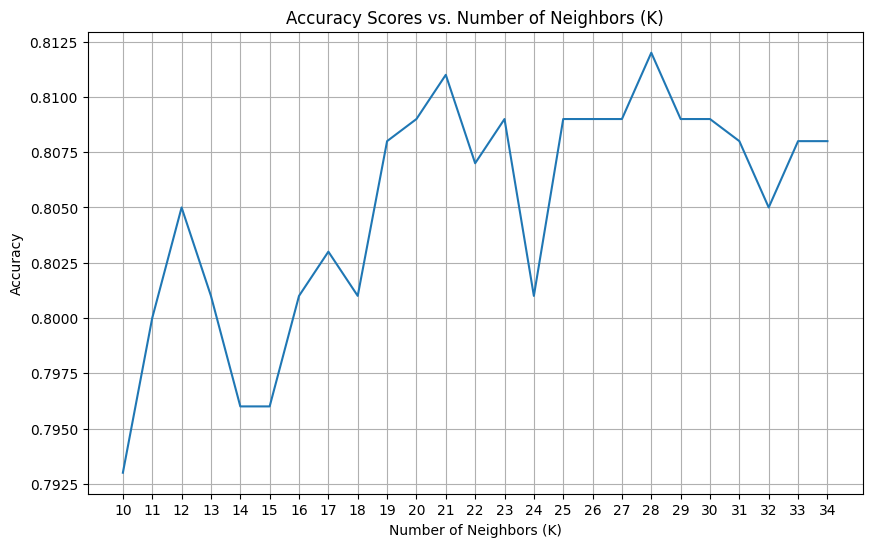

In [160]:
k_values = list(range(10,35))
# Plotting the results of knn_scores
plt.figure(figsize=(10,6))
plt.plot(k_values,knn_scores)
plt.title('Accuracy Scores vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [169]:
knn_classifier = KNeighborsClassifier(n_neighbors=28)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=5)
print("KNeighbours Classifier Accuracy is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy is: 76.62%


**Decision Tree Classifier**

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
# Finding the best accuracy for decision tree algorithm using cross_val_score
decision_scores = []
for i in range(11, 30):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_score = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_score.mean(),3))

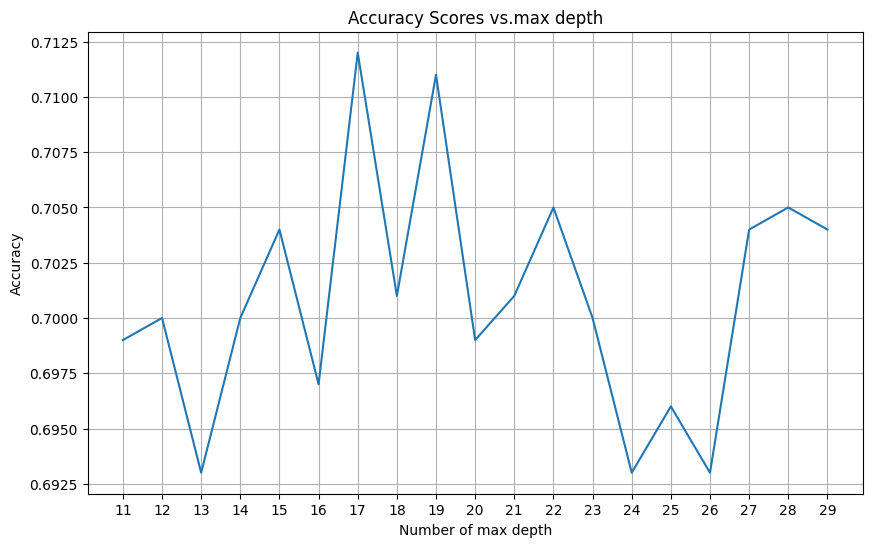

In [173]:
d_values = list(range(11,30))
# Plotting the results of decision_scores
plt.figure(figsize=(10,6))
plt.plot(d_values,decision_scores)
plt.title('Accuracy Scores vs.max depth')
plt.xlabel('Number of max depth')
plt.ylabel('Accuracy')
plt.xticks(d_values)
plt.grid(True)
plt.show()

In [181]:
decision_classifier = DecisionTreeClassifier(max_depth=1)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy is: 75.81%


**Random Forest Classifier**

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
forest_scores = []
for i in range(20,35):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  fvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(fvs_scores.mean(),3))

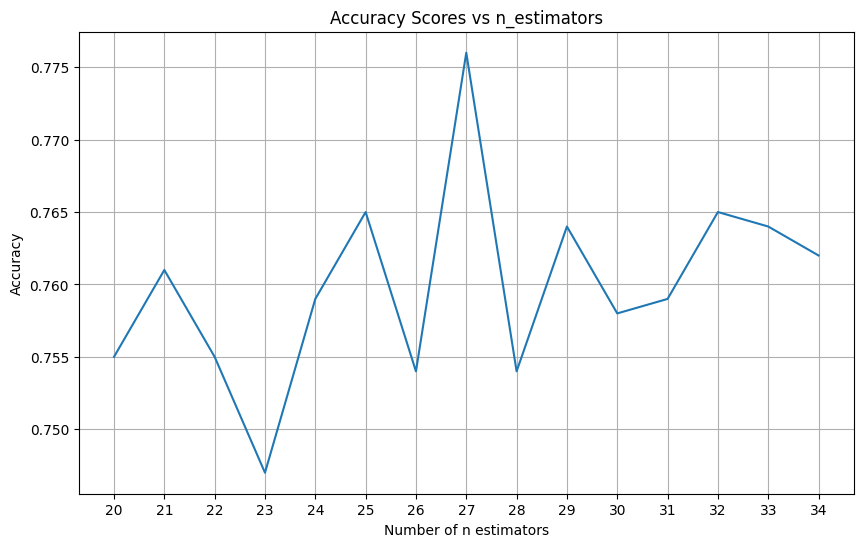

In [185]:
f_values = list(range(20,35))
# Plotting the results of decision_scores
plt.figure(figsize=(10,6))
plt.plot(f_values,forest_scores)
plt.title('Accuracy Scores vs n_estimators')
plt.xlabel('Number of n estimators')
plt.ylabel('Accuracy')
plt.xticks(f_values)
plt.grid(True)
plt.show()

In [193]:
forest_classifier = RandomForestClassifier()
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy  is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy  is: 76.62%


**SVM**

In [194]:
from sklearn.svm import SVC
svm_classifier=SVC()
cvs_scores = cross_val_score(svm_classifier, X, y, cv=5)
print("svm: {}%".format(round(cvs_scores.mean(), 4)*100))

svm: 76.62%


**XGBOOST**

In [195]:
from xgboost import  XGBClassifier
xgb_scores = []
for i in range(1, 20):
    xgb_classifier = XGBClassifier(max_depth=i)
    xvs_scores = cross_val_score(xgb_classifier, X, y, cv=10)
    xgb_scores.append(round(np.mean(xvs_scores), 3))

print("XGBoost Scores:", xgb_scores)

XGBoost Scores: [0.792, 0.773, 0.764, 0.741, 0.749, 0.741, 0.772, 0.764, 0.768, 0.766, 0.762, 0.758, 0.772, 0.762, 0.762, 0.762, 0.762, 0.762, 0.762]


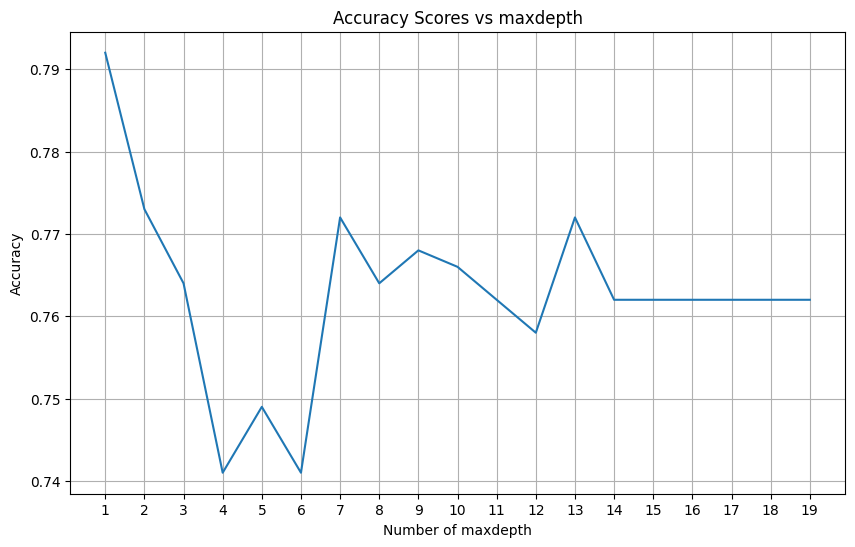

In [196]:
x_values = list(range(1,20))
# Plotting the results of decision_scores
plt.figure(figsize=(10,6))
plt.plot(x_values,xgb_scores)
plt.title('Accuracy Scores vs maxdepth')
plt.xlabel('Number of maxdepth')
plt.ylabel('Accuracy')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [198]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier()
cvs_scores = cross_val_score(xgb_classifier, X, y, cv=5)
print("xgb: {}%".format(round(cvs_scores.mean(), 4)*100))

xgb: 72.16%


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [200]:
# Initialize the KNN classifier
rf_classifier = RandomForestClassifier()

In [201]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [202]:
y_pred = rf_classifier.predict(X_test)

In [208]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

**Model Evaluation**

In [206]:
print("accuracy score of random forest:",accuracy_score(y_test,y_pred)*100)

accuracy score of random forest: 79.72972972972973


In [207]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        34
           1       0.79      0.85      0.82        40

    accuracy                           0.80        74
   macro avg       0.80      0.79      0.79        74
weighted avg       0.80      0.80      0.80        74



In [210]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[25  9]
 [ 6 34]]


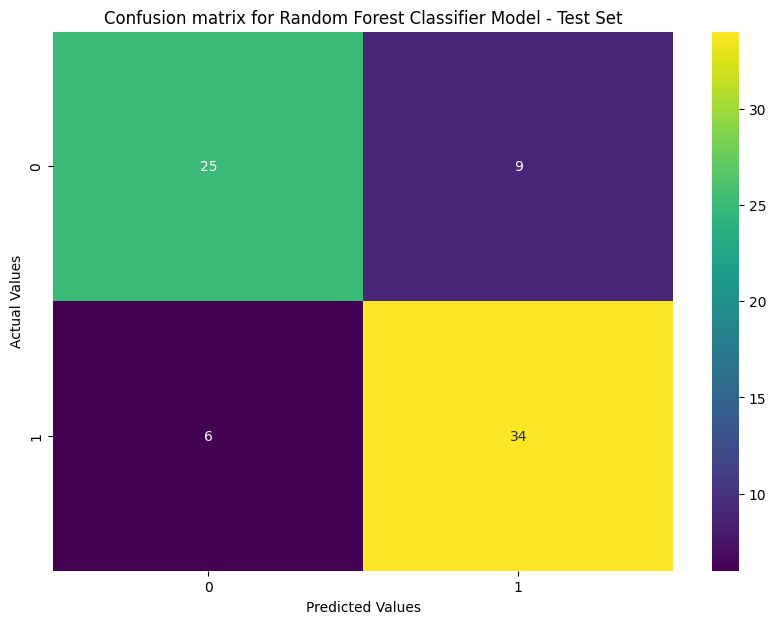

In [212]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="viridis", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**Prediction**

In [214]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_1', 'cp_1', 'cp_2',
       'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_1', 'thal_2'],
      dtype='object')

In [215]:
# Sample feature values for prediction
sample_values = np.array([[50, 140, 260, 150, 0.5, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]])

# Use the trained model to make predictions
prediction = rf_classifier.predict(sample_values)

if prediction[0] == 1:
    print("The person is predicted to have heart disease.")
else:
    print("The person is predicted to not have heart disease.")


The person is predicted to not have heart disease.


In [216]:
# Sample feature values for prediction
sample_values = np.array([[50, 140, 560, 250, 0.5,0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]])

# Use the trained model to make predictions
prediction = rf_classifier.predict(sample_values)

if prediction[0] == 1:
    print("The person is predicted to have heart disease.")
else:
    print("The person is predicted to not have heart disease.")

The person is predicted to have heart disease.


#**Model Deployment**

In [217]:
import pickle

In [219]:
#standard scalar
pickle.dump(Scaler,open("scalar.pkl","wb"))

In [221]:
#random forest classifier
pickle.dump(rf_classifier,open("randomforest.pkl","wb"))

In [222]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('randomforest.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the StandardScaler
with open('scalar.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Function to predict heart disease
def predict_heart_disease(sample_values):
    # Use the loaded model to make predictions
    prediction = model.predict(sample_values)

    if prediction[0] == 1:
        return "The person is predicted to have heart disease."
    else:
        return "The person is predicted to not have heart disease."

# Main Streamlit application
st.title('Heart Disease Prediction')
st.write('Enter the following information to predict whether a person has heart disease or not.')

# Create input fields for user input
age = st.slider('Age', min_value=0, max_value=150, value=50)
trestbps = st.slider('Resting Blood Pressure', min_value=0, max_value=300, value=120)
chol = st.slider('Cholesterol', min_value=0, max_value=600, value=200)
thalch = st.slider('Max Heart Rate', min_value=0, max_value=300, value=150)
oldpeak = st.slider('ST Depression', min_value=0.0, max_value=10.0, value=0.0)
sex_1 = st.selectbox('Sex', [0, 1])
cp_1 = st.selectbox('Chest Pain Type - 1', [0, 1])
cp_2 = st.selectbox('Chest Pain Type - 2', [0, 1])
cp_3 = st.selectbox('Chest Pain Type - 3', [0, 1])
fbs_1 = st.selectbox('Fasting Blood Sugar', [0, 1])
restecg_1 = st.selectbox('Resting Electrocardiographic Results - 1', [0, 1])
restecg_2 = st.selectbox('Resting Electrocardiographic Results - 2', [0, 1])
exang_1 = st.selectbox('Exercise Induced Angina', [0, 1])
slope_1 = st.selectbox('Slope of Peak Exercise ST Segment - 1', [0, 1])
slope_2 = st.selectbox('Slope of Peak Exercise ST Segment - 2', [0, 1])
ca_1_0 = st.selectbox('Number of Major Vessels Colored by Flourosopy - 1', [0, 1])
ca_2_0 = st.selectbox('Number of Major Vessels Colored by Flourosopy - 2', [0, 1])
ca_3_0 = st.selectbox('Number of Major Vessels Colored by Flourosopy - 3', [0, 1])
thal_1 = st.selectbox('Thalassemia - 1', [0, 1])
thal_2 = st.selectbox('Thalassemia - 2', [0, 1])

# Standardize numerical input features
scaled_features = scaler.transform([[age, trestbps, chol, thalch, oldpeak]])

# Prepare sample values for prediction
sample_values = np.array([scaled_features[0].tolist() + [sex_1, cp_1, cp_2, cp_3, fbs_1, restecg_1, restecg_2,
                           exang_1, slope_1, slope_2, ca_1_0, ca_2_0, ca_3_0, thal_1, thal_2]])

# Predict button
if st.button('Predict'):
    # Call the predict_heart_disease function
    prediction = predict_heart_disease(sample_values)
    st.write(prediction)


ModuleNotFoundError: No module named 'streamlit'

In [223]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [228]:
!wget -q -O - ipv4.icanhazip.com

34.16.159.224


In [232]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.159.224:8501

npx: installed 22 in 2.161s
your url is: https://tricky-mammals-carry.loca.lt
  Stopping...
^C
